<a href="https://colab.research.google.com/github/DeepFluxion/Sentiment_Analisy_NLP_Stuff-/blob/main/C%C3%B3pia_de_Classifica%C3%A7%C3%A3o_de_Textos_do_Twitter_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portuguese Tweets for Sentiment Analysis

Este notebook foi desenvolvido para realizar ua análise de sentimentos da base [
Portuguese Tweets for Sentiment Analysis](https://www.kaggle.com/datasets/augustop/portuguese-tweets-for-sentiment-analysis) disponibilizada no site kaggle.

Apesar da disponibilização de dataset de diferentes tamanhos (50k, 100k, 200k e 500k) escolheu-se o dataset de 100k onde 70% será usado para treinamento e 30$ para teste. A base de teste disponibilizada no kaggle possui apenas 5k registros. Com um número maior de dados para teste pode-se avaliar melhor os resultados.

# Descrição do Conjunto de dados

# Contexto

Este conjunto de dados possui tweets em portugues divididos em classes positivas, negativas e neutras para classificação de polaridade de sentimento.

Para coletar e rotular os casos positivos e negativos, o método de supervisão à distância de usar emoticons positivos e negativos usado por [Go et al. (2009)]("https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf") foi empregado.

Para os neutros, texto objetivo de contas populares de newsletters e hashtags específicas adaptadas de [Kouloumpis et al. (2011)](https://ojs.aaai.org/index.php/ICWSM/article/view/14185) foram usados.

Os tweets nos conjuntos de dados foram coletados do Twitter principalmente de 01/08/2018 a 20/10/2018.

- Existem 4 conjuntos de dados principais:

- **Tweets com Tema:** coletados usando cerca de 100 termos políticos junto com emoticons positivos e negativos. Contém cerca de 60 mil tweets.

- **Tweets sem tema**: coletados usando apenas emoticons positivos e negativos. Contém cerca de 780 mil tweets.

- **Tweets neutros de Hashtags**: coletados usando hashtags. Contém cerca de 15 mil tweets.

- **Tweets neutros de contas de notícias**: coletados diretamente de contas de notícias populares. Contém cerca de 35 mil tweets.

A partir deles foram criados os seguintes conjuntos de dados que podem ser usados ​​para treinar e validar algoritmos de classificação:

Conjuntos de dados de treinamento:

- 50k, 100k, 200k, 300k, 400k, 500k tweets positivos e negativos sem qualquer tema
- 50 mil tweets positivos e negativos com tweets políticos
- 100 mil tweets positivos, negativos e neutros sem qualquer tema
Conjuntos de dados de teste:

- 5k tweets positivos e negativos sem qualquer tema
- 5k tweets positivos e negativos com tweets políticos
- 5k tweets positivos, negativos e neutros sem tema

Todos eles têm um número igual de instâncias entre as classes. Seus rótulos de sentimento foram transformados da seguinte forma:

- Rótulo negativo: 0
- Rótulo positivo: 1
- Rótulo neutro: 2

# Questões:

## **1. Com esse dataset tão variado que tipo de soluções acha possível implementar?**
 
-  Em primeiro ligar criar classificadores de sentimento em português, a base permite permite trabalhar com classificadores binários, multiclasses (positivo, negativo e neutro).
- Outro ponto é que ao se observar alguns tweets, precebe-se que há muitas gírias impropérios e principalmente muitos exemplos de linguagem corrente em redes sociais, por exemplo você é vc ou VC, para é pra, entre outros.
- Muitas dessas palavras dessas poderiam constituir uma base para Stop Words, uma vez que **pra** é muito utilizado mas não está nas listas padrão de stopwords.
- Identificar impropérios é uma tarefa necessária, por exemplo em provas do ENEM mencionar impropérios leva a nota zero.
- O fato de uma parte dos dados possuirem temática politica permite mensurar temáticas, nível de esposição de atores dentro do tema política e a polaridade de sentimentos dos mesmos.
- Além disso os classificadosres aqui treinados podem ser usados em outros tipos de textos para classificar sentimentos.

## **2. Imagine que tenha que desenvolver dois serviços:**
  - **Identificar se o tweet se refere a um produto**
  - **Identificar se ele cita alguma vaga de emprego**   
**Escolha um dos projetos e mapeie os requisitos e as necessidades para o desenvolvimento, que tarefas teria que fazer, quais técnicas usaria e porque.**
## Sumário da solução: 
A solução a ser construída é constituída de:
- módulo de coleta de dados de treinamento, 
- módulo de coleta de tweets para análise,
- banco de dados de tweets 
- módulo de pré-processamento de tweets,
- módulo de classificação de tweets,
- módulo de busca nos tweets classificados no 
- implementação de uma solução web para interagir com o usuário

1. **Módulo de coleta de dados de treinamento:** Para coletar dados em que houvesse a certeza de que se referem a um determinado tipo de texto, eu construíria essa base com dados obtidos de textos específicos.No caso de vagas de emprego acredito ser boa alternativa recorrer a sites de anúncios de empregos como o [Indeed](https://br.indeed.com/empregos-em-S%C3%A3o-Paulo,-SP?vjk=35e545bdb60a9162) e coletar anúncios empregando _webscraping_ ou uma API se houver. Neste caso específico seria necessário automatizar essa coleta de textos usando ferramentas como [Selenium](https://selenium-python.readthedocs.io/) e [BeautfulSoup](https://www.crummy.com/software/BeautifulSoup/).No caso dos projetos de vaga de emprego é importante entender que esses tipo de tweet pode ser raro, o que levaria a dados insufientes para treianamento, portanto uma solução é coletar dados de um ambiente para entender as características deste tipo de texto e possibilita o desenvolvimento de uma modelagem adequada de classificadores de texto

2. **Módulo de coleta de dados de tweets:** Seja para formatar bases de treinamento ou para produção, será necessário coletar tweets, portant é necessário que se tenha um módulopara coletar esses dados, o que pode ser feito com os pacotes ofociais do [Tweeter](https://developer.twitter.com/en/docs/twitter-api/tools-and-libraries/v2) ou outras alternativas existes, esse módulo deverá permitir coletar dados com base em parâmetros e busca, como pais, data localização, etc..

3. **Banco de dados de tweets :** É necessário um banco de dados para armazenar os tweets coletados. Em geral a prática de mercado segue a orientação de construir um Data Lake e manter três camadas de dados a primeira de dados brutos na forma que forma coletados da fonte, a segunda com dados pré processados e uma terceira com dados do processo de negócios, por exemplo a classficação do tweet, a data em que foi processado, se foi consultado, etc... A ultima cada além de ser a base a ser exibida no frontend deve conter dados do processo permitindo fazer o Analytics do produto.

4. **Módulo de pré-processamento de tweets :** Neste módulo tem a função de fazer a limpeza dos dados, retirar stopwords, tokenizar, corrigir erro gramaticais, entre outros. Os resultados dever ser aramzenados na cada intermediária do banco de dados. No classificador de emoções desenvolvido a seguir esses processos estão bem exemplificados.

5. **Módulo de classificação de tweets :** Aqui ocorre o processo de Ciência de Dados propriamente dito. A proposta inicial seria de :
Realizar análises exploratórias, extração de entidades nominais (Noun chunks)  e aplicação de métodos não supervionados (modelagem de tópico, clusterização, entre outros) de modo a entender caraterísticas de texto de anúncio de empregos. Técnicas que possívelmente podem ser usadas no classificador são:
  - Classificação por regras, obtidas da extração de palavras chave do Indeed
  - Classificadores supervisionados como SVM ou algyma arquitetura de redes neurais (por exemplo LSTM), mas neste caso deve-se ter uma base de treimanete, que deveria ser construída sobre uma base de tweets, que poderia ser rotulada com base em palavras chave ou algum outro tipo de técnica aplicada a base do Indeed.
  - KNN, Métodos de Distâncias, etc...
  - 
Tecnicas não supervisionadas que poder ser usadas na construçaõ do model de classficação:
- Modelagem de tópicos e extração de palavras chaves
- Redes Neurais do tipo SOM (Self Organazing Maps ou Mapas Autorganizáveis)
- Técnicas de clustering (K-Means, DBScan, UMAP, TSNET, etc..)

6. **Módulo de busca nos tweets classificados no banco de dados** 

7. **Implementação de uma solução web para interagir com o usuário**

## **3. É possível desenvolver alguma parte do item acima com os dados que você tem? Se sim, resolva o possível no tempo disponibilizado.**

Se houver um número razoável de tweets com ofertas de empregos talvez seja possível identifica-los por meio de modelagem de tópicos, se açhar algo interessante avaço até onde for possível.

## **4. Faça um modelo de análise de sentimentos dos tweets.**

A modelagem segue nos próximos items





# **Parte A. Modelo de análise de sentimentos**
Este parte consta das seguintes etapas:

## Etapa 1 - Importação e Instalação das Bibliotecas
## Etapa 2 - Carga dos Dados
## Etapa 3 - Desenvolvimente de uma Função apar Pré processamento dos Dados
## Epara 4 - Pré-processamento da base de dados
## Etapa 5 - Criação do Classificador
## Etapa 6 - teste do Classificador
## Etapa 7 - Avaliação do Modelo e Métricas

# Etapa 1: Importação e instalação das bibliotecas

Neste projeto usaremos a biblioteca [spaCy](https://spacy.io/models/pt) para o porcessamento de linaguagem natural, sobretudo na construção do modelo classificador. A escolha recai pelo desempenho, facilidade de uso e suporte a lígua portuguesa.

In [ ]:
#!pip install spacy --upgrade
!pip install -q spacy==2.2.3 #Ainda não estou muito adaptado com o spaCy 3.0 por isso vou usar essa versão em que sou masi fluente.

In [ ]:
import spacy
spacy.__version__ # verificando a versão instalada após o lançamento da versão 3 alguns comando forma alterados

'2.2.3'

In [ ]:
!python3 -m spacy download pt # carregando o modelo em portugês

     |████████████████████████████████| 21.2 MB 8.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
! pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 13.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=eae395d53e2dbc636382914305ead21748a8bf706500f22f9e48d278b8eca655
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
%%time

# importando as demais bibliotecas
import pandas as pd # manipulação de dataframes
import string # manipulação de strings do python
#import spacy # processamento de liguagem natural
import random # geração de números randomicos
import seaborn as sns # visulaização de gráficos
import matplotlib.pyplot as plt #  visulaização de gráficos
import numpy as np # processamento de matrizes e vetores
import re # regex
from sklearn.model_selection import train_test_split #
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve #metricas de classificação

CPU times: user 2.62 ms, sys: 2.17 ms, total: 4.79 ms
Wall time: 4.77 ms


# Etapa 2: Carga das dados

In [ ]:
url = 'https://raw.githubusercontent.com/DeepFluxion/Sentiment_Analisy_NLP_Stuff-/main/data/Train100.csv' # endereço dos dados no github
base_dados = pd.read_csv(url, delimiter=';') # importando os dados

In [ ]:
base_dados.shape # verificando dimensões da base

(100000, 5)

In [ ]:
base_dados.head() # visualizando os 5 primeiros registros

,id,tweet_text,tweet_date,sentiment,query_used
0,1038907387523022848,FAV e falo de vocês por dm :),Sun Sep 09 21:49:57 +0000 2018,1,:)
1,1038907373010804737,"@lalenes_ O bom de lembrar é pra não repetir, ...",Sun Sep 09 21:49:54 +0000 2018,1,:)
2,1038907372679389185,vamos porquinhos !!! :D https://t.co/UFwKt1dCxe,Sun Sep 09 21:49:54 +0000 2018,1,:)
3,1038907369353355265,"Tenho raiva de vc por vc ser tão linda, eu me ...",Sun Sep 09 21:49:53 +0000 2018,1,:)
4,1038907325107634177,@Daniel_Albino Eu disse espectacular :),Sun Sep 09 21:49:42 +0000 2018,1,:)


In [ ]:
base_dados.tail() # visualizando os 5 ultimos registros

,id,tweet_text,tweet_date,sentiment,query_used
99995,1037845711541477376,@CcPc___ Sou pois :((,Thu Sep 06 23:31:14 +0000 2018,0,:(
99996,1037845711273029632,assistindo o streamer que eu gosto jogando o j...,Thu Sep 06 23:31:14 +0000 2018,0,:(
99997,1037845707795906563,uma amiga minha se declarou p mim toda bonita ...,Thu Sep 06 23:31:13 +0000 2018,0,:(
99998,1037845705409417217,@chriszillla Eu também :(,Thu Sep 06 23:31:13 +0000 2018,0,:(
99999,1037845704411160578,Curtia mm de ir ao cinema antes das aulas come...,Thu Sep 06 23:31:12 +0000 2018,0,:(


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


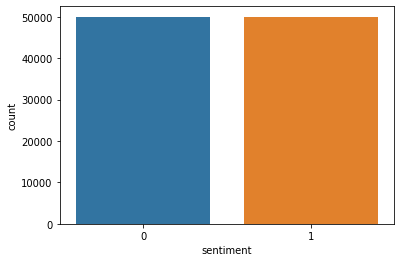

In [ ]:
sns.countplot(base_dados['sentiment'], label = 'Contagem'); # visualizando a quantidade de dados conforme sentimento

In [ ]:
base_dados.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True) # Eliminado daos que não serão usado por enquanto

In [ ]:
base_dados.head() # verificando se o drop() correu bem

,tweet_text,sentiment
0,FAV e falo de vocês por dm :),1
1,"@lalenes_ O bom de lembrar é pra não repetir, ...",1
2,vamos porquinhos !!! :D https://t.co/UFwKt1dCxe,1
3,"Tenho raiva de vc por vc ser tão linda, eu me ...",1
4,@Daniel_Albino Eu disse espectacular :),1


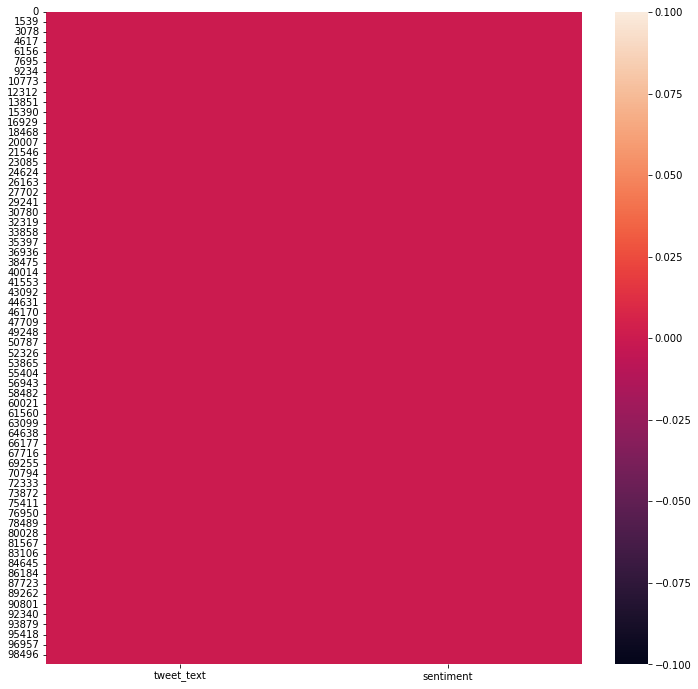

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.isnull(base_dados));

In [ ]:
base_dados.sentiment.isnull().sum() # forma alternativa de verificar registros nulos

0

## Criação da Base de teste e de treinamentos proporção 30%

In [ ]:
base_teste = base_dados.sample(frac=0.3, replace=False) # retirando uma amostra aleatória de 30% da base de dados
base_treinamento = base_dados.loc[~base_dados.index.isin(base_teste.index.tolist()),:] # encontrando do 70% retantes
base_teste=base_teste.reset_index(drop=True) # reset dos indices
base_treinamento=base_treinamento.reset_index(drop=True) # reset dos indices

In [ ]:
base_teste.shape

(30000, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


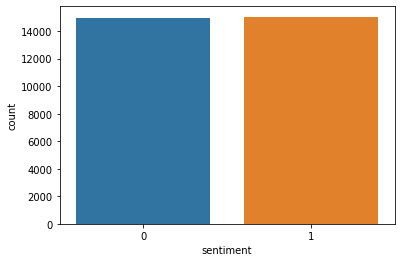

In [ ]:
sns.countplot(base_teste['sentiment'], label='Contagem'); # Verificando se a amostra não criou um desbalanceamento na classe sentiment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


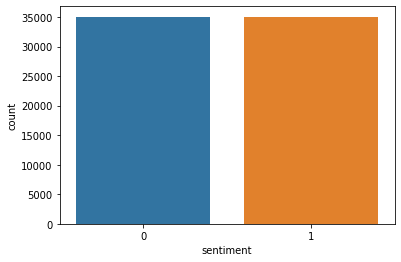

In [ ]:
sns.countplot(base_treinamento['sentiment'], label='Contagem'); # Verificando se a amostra não criou um desbalanceamento na classe sentiment

# Etapa 3: Função para pré-processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [ ]:
%%time
pln = spacy.load("pt") # carregando o modelo para portugues
pln

CPU times: user 2.42 s, sys: 77.7 ms, total: 2.5 s
Wall time: 2.47 s


In [ ]:
base_treinamento['tweet_text'][1500] # selecionado um texto para testes da função

'manda uma pergunta pra mim, é de graça :) https://t.co/7VMbeFq1bV'

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS # Criando as Stop words

In [ ]:
print(stop_words)

{'quieta', 'isso', 'estiveste', 'deve', 'vocês', 'sempre', 'ou', 'ambos', 'estou', 'baixo', 'muitos', 'for', 'bastante', 'estivestes', 'vós', 'nossas', 'foste', 'são', 'cedo', 'aquela', 'tão', 'números', 'catorze', 'partir', 'tanto', 'mês', 'primeiro', 'quero', 'fazeis', 'fim', 'cá', 'área', 'uns', 'coisa', 'nuns', 'ver', 'desta', 'contudo', 'tendes', 'essa', 'foram', 'forma', 'segundo', 'temos', 'caminho', 'fazes', 'vem', 'fazer', 'estará', 'só', 'outros', 'meus', 'ali', 'sétima', 'sobre', 'sexto', 'quinze', 'possivelmente', 'nos', 'primeira', 'zero', 'obrigada', 'esses', 'ainda', 'usa', 'ela', 'talvez', 'nenhuma', 'ser', 'deste', 'após', 'ligado', 'naquele', 'alguns', 'fazemos', 'custa', 'vinte', 'debaixo', 'você', 'aos', 'nesse', 'minhas', 'está', 'adeus', 'duas', 'somos', 'quieto', 'logo', 'dos', 'aí', 'segunda', 'entre', 'somente', 'quarto', 'disso', 'nível', 'tentar', 'novas', 'oitavo', 'quarta', 'tente', 'teve', 'ter', 'diz', 'põe', 'portanto', 'onze', 'eu', 'têm', 'mil', 'seis'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(texto):
  '''
  parâmetro de entrada: texto (str)
  a função prepocessamento executa as seguintes operações na string texto:
  - converte todos os caracteres para minusculas
  - normaliza o nome do usuário
  - elimina urls
  - elimina espaçoes em branco duplicados
  - substitui emoticons por textos pré definidos
  - Executa lematização e tokenização
  - Elimina stopwords
  retorna texto preporcessado (str)
  '''
  # Vamos deixar todas as letras em minúsculas
  texto = texto.lower()

  # Normanizando o nome do usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

  # Eliminado URLs
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Retirando Espaços em branco duplicados
  texto = re.sub(r" +", ' ', texto)

  # Substituindo Emoticons por emoção carcteristica
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes: # iterando sobre a lisat de emoções
    texto = texto.replace(emocao, lista_emocoes[emocao]) # fazendo o replace dos emoticos

  # Tokenização e Lematização
  documento = pln(texto) # transformando texto em um objeto do spaCy

  lista = []
  for token in documento:
    lista.append(token.lemma_) # adcionando o token de texto lematizado 
  
  # Eliminado stop words e pontuações da lista
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  # transformando a lista em uma string
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  
  return lista

In [ ]:
# testando a função
texto_teste = base_treinamento.loc[1500,'tweet_text']
resultado = preprocessamento(texto_teste)
print(texto_teste)
print(resultado)

manda uma pergunta pra mim, é de graça :) https://t.co/7VMbeFq1bV
mandar umar perguntar pra mim graça emocaopositiva


# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [ ]:
%%time
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

CPU times: user 16min 45s, sys: 5.03 s, total: 16min 50s
Wall time: 16min 46s


In [ ]:
base_treinamento.head(10)

,tweet_text,sentiment
0,fav e falir dm emocaopositiva,1
1,o lembrar pra repetir o pessoa emocaopositiva,1
2,porquinho emocaopositiva,1
3,espectacular emocaopositiva,1
4,feliz brownie ficar emocaopositiva,1
5,mandar algum emocaopositiva,1
6,lindar dia emocaopositiva,1
7,gostar cozinhar emocaopositiva,1
8,biel preparar pra sair negar morto pra carto...,1
9,torcer pra o vasco recuperar o hoje merecer ...,1


In [ ]:
%%time
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

CPU times: user 7min 6s, sys: 2.85 s, total: 7min 9s
Wall time: 7min 7s


In [ ]:
base_teste.head(10)

,tweet_text,sentiment
0,e frio o barriga q n sair affu emocaonegativa,0
1,relativizar amigar emocaopositiva,1
2,o menino vidar o paixão emocaonegativa,0
3,tô triste emocaonegativa,0
4,neosoro acabar emocaonegativa,0
5,medo turma emocaopositiva,1
6,pelar jeito sobrar o dacioclo parir presidênci...,1
7,esquecer inscrever o canal emocaopositiva,1
8,gente sério o catra morrer manir emocaonegativa,0
9,estragar o porra celular o mulher seven respon...,1


### Tratamento da classe

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [ ]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_treinamento_final)

70000

In [ ]:
base_dados_treinamento_final[10:15]

[['  parecer emocaopositiva', {'NEGATIVO': False, 'POSITIVO': True}],
 ['deixar o relatório pra comer o outro emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['  oi debby nó o processar renovação contratar algum série castleaxn sair programação notícia retornar nó avisar emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['e o trollface camarada trazer drink gelar emocaopositiva mijar gelar copar catarrado emocaonegativa',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['feliz pq o lista geometria e entender tudinho emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}]]

In [ ]:
base_dados_treinamento_final[45000:45005]

[['  o lucky one comprar o e o monster ano passar umar menino pretender vender e comprar outro pq mandar errar e tá amassadinho emocaonegativa',
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['  amigo emocaonegativa', {'NEGATIVO': True, 'POSITIVO': False}],
 ['pai falar mó frouxar pq levar ninguém pro motel emocaonegativa',
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['aaaaaaaa beber amar baekhyun emocaonegativa',
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['parceiro bad emocaonegativa', {'NEGATIVO': True, 'POSITIVO': False}]]

# Etapa 5: Criação do classificador

In [ ]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [ ]:
modelo.begin_training()
for epoca in range(30):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 1.218205079914908e-05}
{'textcat': 2.1349937386304363e-06}
{'textcat': 5.643742162159474e-07}
{'textcat': 6.993268377214392e-07}
{'textcat': 1.5580249531428787e-07}
{'textcat': 1.2305827591252308e-07}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.21820508e-05, 1.21820508e-05, 1.21820508e-05, ...,
       3.87862030e-07, 3.87862030e-07, 3.87862030e-07])

Text(0, 0.5, 'Erro')

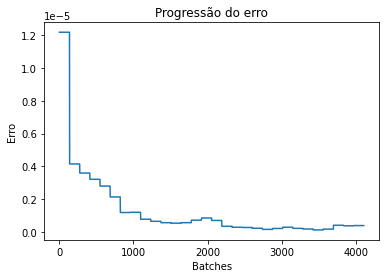

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [ ]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

## Texto positivo

In [ ]:
texto_positivo = base_teste['tweet_text'][1500]
texto_positivo

'o fernando usuário engajar o plataforma code nation e participar ativamente fórum discussão valer pelar parceria e pelar foto fernando esperar curto o presentar emocaopositiva'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

o fernando usuário engajar o plataforma code nation e participar ativamente fórum discussão valer pelar parceria e pelar foto fernando esperar curto o presentar emocaopositiva

In [ ]:
previsao.cats

{'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812}

## Texto negativo

In [ ]:
base_teste['tweet_text'][4000]

'  emocaonegativa ai amandoca amar'

In [ ]:
texto_negativo = base_teste['tweet_text'][4000]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'NEGATIVO': 0.9999545812606812, 'POSITIVO': 4.539786823443137e-05}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [ ]:
previsoes = []
for texto in base_treinamento['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 0.00017669676162768155, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.835149593418464e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 7.901422213762999e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 6.5806889324449e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 8.816719491733238e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.539786823443137e-05, 'POSITIVO': 0.9999545812606812},
 {'NEGATIVO': 4.53978

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
respostas_reais = base_treinamento['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9998428571428571

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[35041,     7],
       [    4, 34948]])

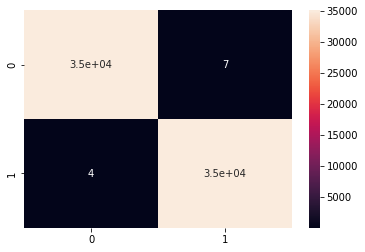

In [ ]:
sns.heatmap(cm, annot=True)

## Avaliação na base de teste

In [ ]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_teste['sentiment'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.9968

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm
cmp = cm/respostas_reais.shape[0]

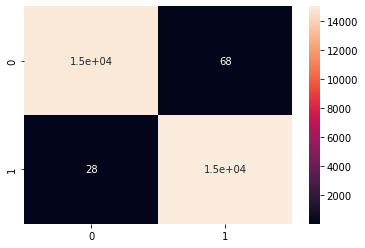

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print('Verdadeiros Positivos :'+str(cm[0][0]))
print('Verdadeiros Negativos :'+str(cm[1][1]))
print('Falsos Positivos :'+str(cm[0][1]))
print('Falsos Negativos :'+str(cm[1][0]))

Verdadeiros Positivos :14884
Verdadeiros Negativos :15020
Falsos Positivos :68
Falsos Negativos :28


In [ ]:
import numpy as np
from pprint import pprint
import unicodedata

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#Plotagem
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
Base_dados = pd.concat([base_teste,base_treinamento], axis=0, ignore_index=True)

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True remove pontuações

In [ ]:
data_words_nostops = list(sent_to_words(base_dados.tweet_text.values.tolist()))

In [ ]:
# Criando dicionário
id2word = corpora.Dictionary(data_words_nostops)

# Criando corpus
texts = data_words_nostops

# Frequencia do documento do termo
corpus = [id2word.doc2bow(text) for text in texts]
# visualizando
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [ ]:
%%time

# Construindo LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Imprindo as palavras chaves nos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.135*"vc" + 0.123*"saudade" + 0.091*"ta" + 0.030*"beber" + 0.027*"tirar" + '
  '0.026*"sdd" + 0.025*"odiar" + 0.020*"errar" + 0.018*"aaaa" + 0.015*"oq"'),
 (1,
  '0.120*"ai" + 0.090*"conseguir" + 0.080*"vir" + 0.080*"amor" + 0.074*"mt" + '
  '0.048*"eh" + 0.029*"feliz" + 0.027*"pai" + 0.024*"merda" + 0.020*"levar"'),
 (2,
  '0.167*"triste" + 0.111*"tô" + 0.085*"gente" + 0.059*"deixar" + 0.057*"caro" '
  '+ 0.052*"poxa" + 0.045*"pensar" + 0.018*"dor" + 0.016*"mto" + '
  '0.013*"neném"'),
 (3,
  '0.066*"outro" + 0.060*"so" + 0.048*"acreditar" + 0.034*"ler" + '
  '0.033*"vezar" + 0.032*"jeito" + 0.030*"sobrar" + 0.026*"causar" + '
  '0.019*"quantum" + 0.017*"jurar"'),
 (4,
  '0.784*"emocaonegativa" + 0.036*"amar" + 0.023*"sentir" + 0.015*"pelar" + '
  '0.012*"morrer" + 0.006*"sdds" + 0.003*"entrar" + 0.003*"iriar" + '
  '0.002*"virar" + 0.002*"apoiar"'),
 (5,
  '0.079*"pessoa" + 0.078*"passar" + 0.077*"nado" + 0.071*"deus" + '
  '0.063*"vidar" + 0.040*"melhor" + 0.037*"ajudar" + 

In [ ]:
%%time
# Calculando a perplexidade
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a medida de qualidade do modelo, quanto menor melhro.

# Calculando o score de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.575925859042172

Coherence Score:  0.28535129849159535
CPU times: user 18.2 s, sys: 384 ms, total: 18.6 s
Wall time: 22.8 s


In [ ]:
# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus, texts, limit, start=3, step=3):
    """
    Calcula o valor de coerência coherence para diferentes quantidades de tópicos

    Entrada:
    ----------
    dictionary : Gensim dicionário
    corpus : Gensim corpus
    texts : Lista com os textos de entrada
    limite : número máximo de tópicos

    Retorno:
    -------
    model_list : Lista de modelos de tópicos de LDA
    coherence_values : Valor de coerência correspondente ao modelo LDA com o respectivo número de tópicos.
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_nostops, start=3, limit=40, step=6)

CPU times: user 2min 57s, sys: 3.05 s, total: 3min
Wall time: 3min 28s


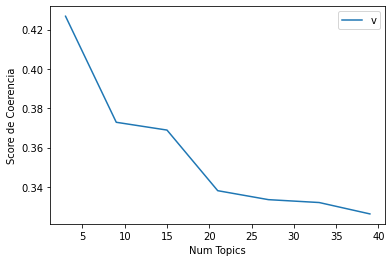

In [ ]:
# Mostrando gráfico
limit=40; start=3; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Score de Coerencia")
plt.legend(("valores_coerencia"), loc='best')
plt.show()

In [ ]:
# Lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico
for m, cv in zip(x, coherence_values):
    print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))

A quantidade de tópicos = 3  tem um valor de coerência de  0.4268
A quantidade de tópicos = 9  tem um valor de coerência de  0.3728
A quantidade de tópicos = 15  tem um valor de coerência de  0.3689
A quantidade de tópicos = 21  tem um valor de coerência de  0.338
A quantidade de tópicos = 27  tem um valor de coerência de  0.3335
A quantidade de tópicos = 33  tem um valor de coerência de  0.332
A quantidade de tópicos = 39  tem um valor de coerência de  0.3262


In [ ]:
# Selecionando o modelo  e imprimindo os tópicos.
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(15,
  '0.234*"emocaonegativa" + 0.063*"saudade" + 0.050*"ai" + 0.047*"amor" + '
  '0.037*"hoje" + 0.031*"pensar" + 0.029*"eh" + 0.029*"perder" + 0.026*"anjo" '
  '+ 0.022*"amar"'),
 (5,
  '0.178*"dia" + 0.075*"jogar" + 0.034*"emocaopositiva" + 0.033*"sdds" + '
  '0.024*"bonito" + 0.023*"começar" + 0.016*"musicar" + 0.015*"nenê" + '
  '0.011*"dever" + 0.010*"manhã"'),
 (6,
  '0.058*"gt" + 0.055*"amanhã" + 0.024*"seriar" + 0.018*"legal" + '
  '0.017*"amigar" + 0.016*"sorriso" + 0.015*"super" + 0.014*"internet" + '
  '0.012*"emocaonegativa" + 0.012*"sortir"'),
 (9,
  '0.125*"emocaonegativa" + 0.081*"vc" + 0.075*"nao" + 0.071*"gente" + '
  '0.032*"pq" + 0.031*"pra" + 0.028*"ta" + 0.026*"achar" + 0.017*"lembrar" + '
  '0.017*"outro"'),
 (0,
  '0.045*"trabalhar" + 0.041*"comprar" + 0.035*"pra" + 0.028*"seguir" + '
  '0.022*"live" + 0.020*"gato" + 0.019*"cabeça" + 0.017*"praia" + 0.017*"umar" '
  '+ 0.016*"irmão"'),
 (11,
  '0.086*"nado" + 0.072*"vidar" + 0.030*"suar" + 0.025*"haver" + 0.02

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words_nostops):
    # Saída inicial
    sent_topics_df = pd.DataFrame()

    # Obtém o tópico principal em cada documento
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Obtém o tópico dominante, contribuição em percentual e palavras-chave para cada documento
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => tópico dominante
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Tópico dominante', 'Percentual de Contribuição', 'Palavras Chave']

    # Adiciona o texto original no final da saída
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_words_nostops)

# Formatando
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Número do documento', 'Tópico dominante', 'Perc. de Contribuição do Tópico', 'Palavras Chave', 'Transcription']

# Mostre
df_dominant_topic.head(10)

,Número do documento,Tópico dominante,Perc. de Contribuição do Tópico,Palavras Chave,Transcription
0,0,17.0,0.2230,"emocaonegativa, sentir, casar, dormir, consegu...","[frio, barriga, sair, affu, emocaonegativa]"
1,1,6.0,0.7619,"gt, amanhã, seriar, legal, amigar, sorriso, su...","[relativizar, amigar, emocaopositiva]"
2,2,1.0,0.3898,"emocaonegativa, sair, mundo, tbm, parecer, rui...","[menino, vidar, paixão, emocaonegativa]"
3,3,8.0,0.7619,"emocaonegativa, to, triste, deus, ficar, poxa,...","[tô, triste, emocaonegativa]"
4,4,14.0,0.5048,"acabar, so, chamar, emocaonegativa, imaginar, ...","[neosoro, acabar, emocaonegativa]"
5,5,5.0,0.4901,"dia, jogar, emocaopositiva, sdds, bonito, come...","[medo, turma, emocaopositiva]"
6,6,20.0,0.7445,"verdade, tb, entender, cantar, certar, umar, v...","[pelar, jeito, sobrar, dacioclo, parir, presid..."
7,7,20.0,0.2987,"verdade, tb, entender, cantar, certar, umar, v...","[esquecer, inscrever, canal, emocaopositiva]"
8,8,13.0,0.5588,"emocaonegativa, tá, morrer, mac, miller, acred...","[gente, sério, catra, morrer, manir, emocaoneg..."
9,9,9.0,0.3554,"emocaonegativa, vc, nao, gente, pq, pra, ta, a...","[estragar, porra, celular, mulher, seven, resp..."


In [ ]:
# Gráfico do pyLDAVis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# Visualizando os topicos
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.461062  0.140994       1        1  15.056742
19     0.066759  0.073624       2        1  11.342649
9     -0.068662 -0.328043       3        1   5.489957
6     -0.061774 -0.214403       4        1   5.193625
18     0.001547  0.007621       5        1   5.015751
2     -0.031724 -0.064003       6        1   4.591964
11     0.043030  0.039941       7        1   4.413694
1     -0.015044 -0.026146       8        1   4.260237
5      0.045219  0.036080       9        1   4.196469
15     0.070802  0.050538      10        1   4.157960
12     0.070147  0.051866      11        1   3.983583
16     0.011949  0.010083      12        1   3.948306
7      0.033317  0.026603      13        1   3.889696
0     -0.001926 -0.008607      14        1   3.811850
10     0.041116  0.032429      15        1   3.776569
8      0.045978  0.032520      16        1   3.750304
3      0.056233  0.037938      17        1   3.446568
13     0.048376  0.033685      18        1   3.399466
14     0.038313  0.028486      19        1   3.381737
17     0.067406  0.038792      20        1   2.892873, topic_info=                Term          Freq         Total Category  logprob  loglift
2     emocaonegativa  76343.000000  76343.000000  Default  30.0000  30.0000
66            querer  13443.000000  13443.000000  Default  29.0000  29.0000
44               pra   9283.000000   9283.000000  Default  28.0000  28.0000
72             ficar   6227.000000   6227.000000  Default  27.0000  27.0000
48                to   6153.000000   6153.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
174           chocar    122.292551    123.268967  Topic20  -5.0308   3.5350
2832              bc    118.549478    119.525893  Topic20  -5.0619   3.5347
2939          bostar    115.166813    116.143228  Topic20  -5.0909   3.5345
2377            dedo    113.347608    114.324024  Topic20  -5.1068   3.5343
1116           bicho    112.235614    113.212030  Topic20  -5.1166   3.5343

[631 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
403      18  0.997616      aaa
510      14  0.998010     aaaa
237       6  0.996096    aaaaa
50        2  0.997633   aaaaaa
4293     19  0.994849  aaaaaaa
...     ...       ...      ...
1297      9  0.994509    época
3901     16  0.986641    ícone
2150     18  0.993084     ódio
2195      5  0.990781   ônibus
1940      7  0.997463    único

[602 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 20, 10, 7, 19, 3, 12, 2, 6, 16, 13, 17, 8, 1, 11, 9, 4, 14, 15, 18])

Essa base deveria ser melhor explorada, para ser melhor entendida, os tópicos não permitem uma compreendão de temas. Na literatura hpa críticas ao uso da LDA em textos curtos. O que se vê é que muitas palavras chave são gírias e impropérios.

Acho que uma boa idéia seria buscar mensagens de contas corporativas, parece que o conteúdo dos tweets foi coletado de forma aletório, ou com algum critério que atendia o objetivo de classificar emoções, mas que não atende a identificação de vagas.

Também tentei identifiar NER - Named Entity Recognition e o SpaCy não deu bons resultados.